# Maya

## Research question/interests

My research questions focus on CO2 emissions and GDP. I have two main questions which are:

1. In recent times, how does the correlation between GDP and CO2 emissions compare in third world countries vs first world countries? Do these correlations hold during financial crises periods?

2. What percentage of CO2 emissions are first world and third world countries each presently responsible for? How has this changed over the years?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataEmissions = pd.read_csv('../data/raw/CO2emissions.csv', skiprows=4) 
dataEmissions = dataEmissions.drop(dataEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1)
dataEmissions = dataEmissions.drop(dataEmissions.columns[[31, 32,33]], axis=1)

print(dataEmissions)

                    Country Name      1990      1991      1992      1993  \
0                          Aruba       NaN       NaN       NaN       NaN   
1    Africa Eastern and Southern  0.999038  0.953224  0.915661  0.916485   
2                    Afghanistan  0.191745  0.167682  0.095958  0.084721   
3     Africa Western and Central  0.478144  0.530016  0.568305  0.523529   
4                         Angola  0.553662  0.544539  0.543557  0.708984   
..                           ...       ...       ...       ...       ...   
261                       Kosovo       NaN       NaN       NaN       NaN   
262                  Yemen, Rep.  0.567037  0.690937  0.704793  0.627105   
263                 South Africa  6.729799  6.424622  6.175430  6.219194   
264                       Zambia  0.340930  0.349232  0.337224  0.289956   
265                     Zimbabwe  1.585444  1.713321  1.694416  1.539741   

         1994      1995      1996      1997      1998  ...      2010  \
0         NaN  

In [ ]:
dataGDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')
print(dataGDP)

           Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6161     Zimbabwe  ZWE  2016   
6162     Zimbabwe  ZWE  2017   
6163     Zimbabwe  ZWE  2018   
6164     Zimbabwe  ZWE  2019   
6165     Zimbabwe  ZWE  2020   

      GDP per capita, PPP (constant 2017 international $)  
0                                           1189.784668    
1                                           1235.810059    
2                                           1200.277954    
3                                           1286.793701    
4                                           1315.789062    
...                                                 ...    
6161                                        3678.217041    
6162                                        3795.642334    
6163                                        3923.030518    
6164           

## Milestone 3

### Wrangle Data

In [ ]:
#Wrangle Data: Restructure data format of Emissions Data
dataEmissions = dataEmissions.melt(id_vars = ["Country Name"])
dataEmissions2 = dataEmissions.copy(deep = False )

# Rename rows in restruced Emissions data 
dataEmissions2.rename(columns={dataEmissions2.columns[1]: 'Year', dataEmissions2.columns[2]: 'CO2 emissions'},inplace=True)

#Drop rows that don't have CO2 emissions data 
dataEmissions2=dataEmissions2.dropna(subset=['CO2 emissions'])
dataEmissions2.to_csv(r'../data/processed/modifiedEmissions.csv', index=False)

#Rename GDP column to make it mergable with CO2 emissions Data 
dataGDP.rename(columns={dataGDP.columns[0]: 'Country Name'}, inplace=True)
dataGDP.to_csv(r'../data/processed/modifiedGDP.csv', index=False)

#Make sure GDP and data Emissions columns are of the same type int, else they aren't mergable
dataGDP['Year'] = dataGDP['Year'].astype(int)
dataEmissions2['Year'] = dataEmissions2['Year'].astype(int)

#Merge CO2 emissions data and GDP, keeping extra columns from GDP
mergeCO2AndGDP = pd.merge(dataGDP, dataEmissions2, on=['Country Name', 'Year'], how = 'left')

#Drop missing values and save data 
mergeCO2AndGDP = mergeCO2AndGDP.dropna(subset=['CO2 emissions'])
mergeCO2AndGDP.to_csv(r'../data/processed/CO2AndGDP.csv', index=False)



                     Country Name variable     value
0                           Aruba     1990       NaN
1     Africa Eastern and Southern     1990  0.999038
2                     Afghanistan     1990  0.191745
3      Africa Western and Central     1990  0.478144
4                          Angola     1990  0.553662
...                           ...      ...       ...
7975                       Kosovo     2019       NaN
7976                  Yemen, Rep.     2019  0.380633
7977                 South Africa     2019  7.507736
7978                       Zambia     2019  0.380717
7979                     Zimbabwe     2019  0.802979

[7980 rows x 3 columns]


# Exploratory Data Analysis

<AxesSubplot: >

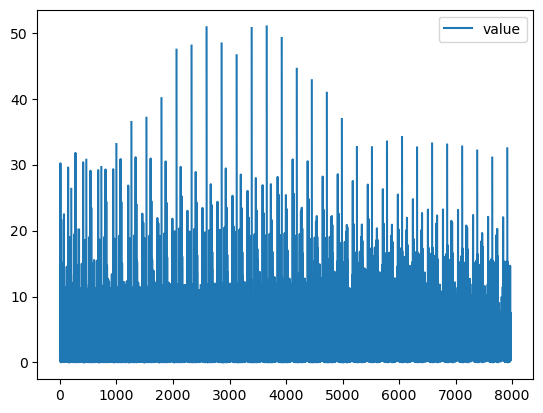

In [ ]:
dataEmissions.plot()

(0.0, 2.0)

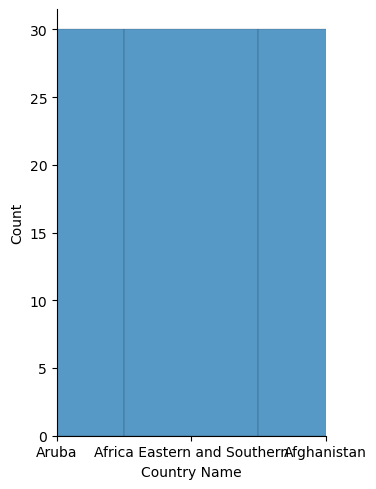

In [ ]:
sns.displot(dataEmissions['Country Name'])
plt.xlim(0, 2)


(0.0, 2.0)

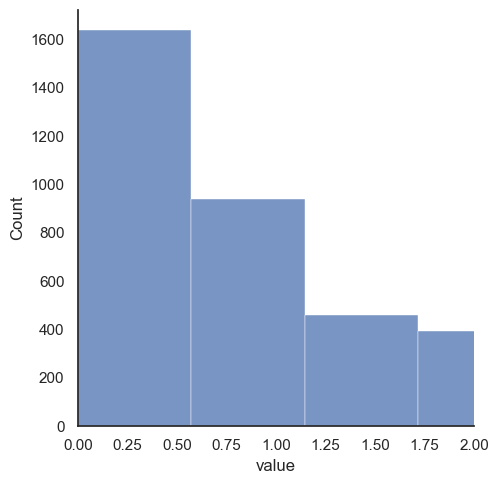

In [ ]:
sns.displot(dataEmissions['value'])
plt.xlim(0, 2)


(0.0, 2.0)

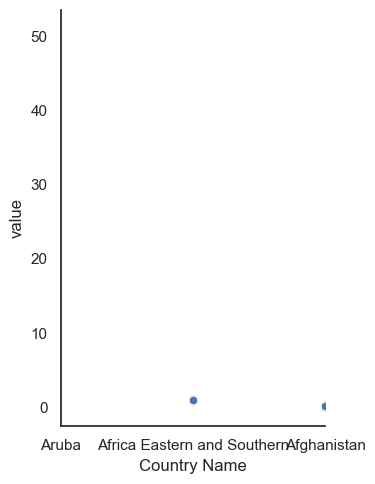

In [ ]:
sns.relplot(data=dataEmissions, x="Country Name", y="value")
plt.xlim(0, 2)


### Task 2 - Data Analysis Pipeline


1. Load Data (Done in cell 1 and 2)
2. Clean Data (Done in cell 1 and 3) 
3. Process Data (Done in cell 3)
4. Wrangle Data (Done in cell 3)  




### Task 3 - Method Chaining and Writing Python Programs 

### Task 4 - Answering My Research Questions 

1. In recent times, how does the correlation between GDP and CO2 emissions compare in third world countries vs first world countries? Do these correlations hold during financial crises periods?

2. What percentage of CO2 emissions are first world and third world countries each presently responsible for? How has this changed over the years?